# This Dataset is from UC Irvine ML Data Repository

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data_banknote_authentication.csv")

In [3]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
# visualizing the distribution

<Axes: xlabel='Variance_Wavelet', ylabel='Skewness_Wavelet'>

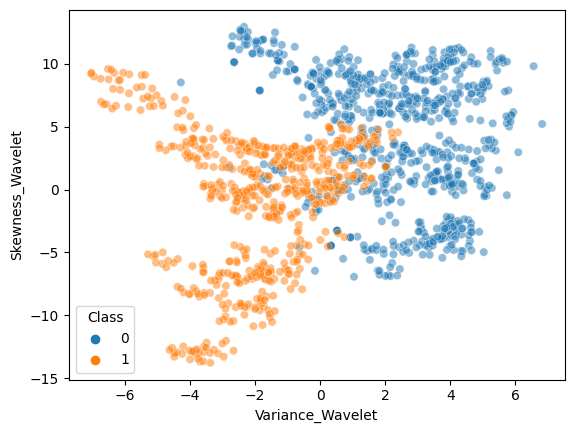

In [5]:
sns.scatterplot(x='Variance_Wavelet',y='Skewness_Wavelet',data=df,hue='Class',alpha=0.5)

<Axes: xlabel='Variance_Wavelet', ylabel='Image_Entropy'>

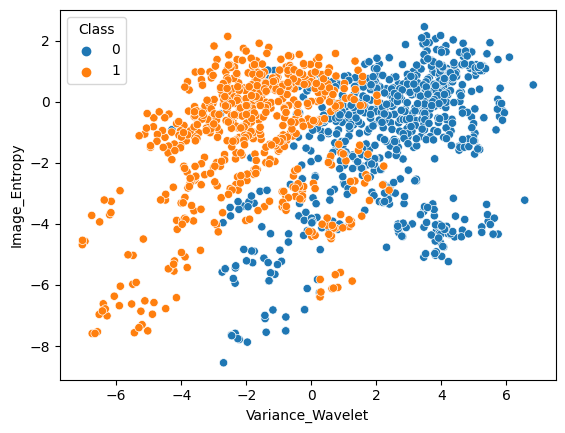

In [6]:
sns.scatterplot(x='Variance_Wavelet',y='Image_Entropy',data=df,hue='Class')

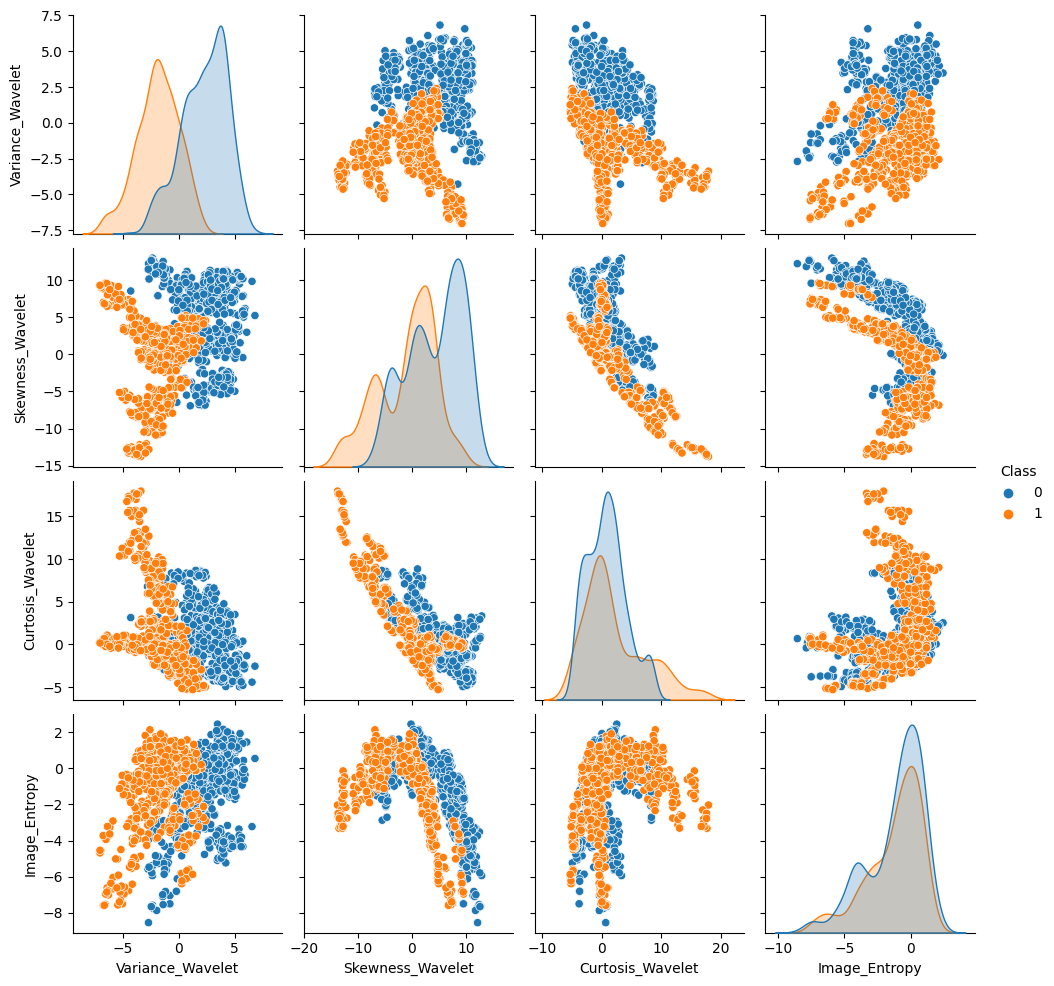

In [7]:
sns.pairplot(data=df,hue='Class')

In [22]:
X=df.drop('Class',axis=1)

In [23]:
y=df['Class']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
#  here we don't need to scale or standardize the features in tree based models since here we compare individual features that 
#  if value is < this particual value ,so no need to scale. 

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rfc=RandomForestClassifier()

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
n_estimators=[64,100,128,200]

In [13]:
max_features=[2,3,4]

In [14]:
bootstrap=[True, False]

In [15]:
oob_score=[True,False]

In [16]:
param_grid={
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap':bootstrap,
    'oob_score':oob_score
}

In [18]:
grid_model=GridSearchCV(rfc,param_grid)

In [26]:
grid_model.fit(X_train,y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [27]:
grid_model.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 100, 'oob_score': False}

In [29]:
#  now training actual model with optimal parameters

In [33]:
rfc=RandomForestClassifier(n_estimators=100,max_features=3,oob_score=True)

In [34]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=3, oob_score=True)

In [35]:
rfc.oob_score

True

In [36]:
rfc.oob_score_

0.9927083333333333

In [38]:
y_pred=rfc.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
confusion_matrix(y_test,y_pred)

array([[234,   4],
       [  0, 174]], dtype=int64)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

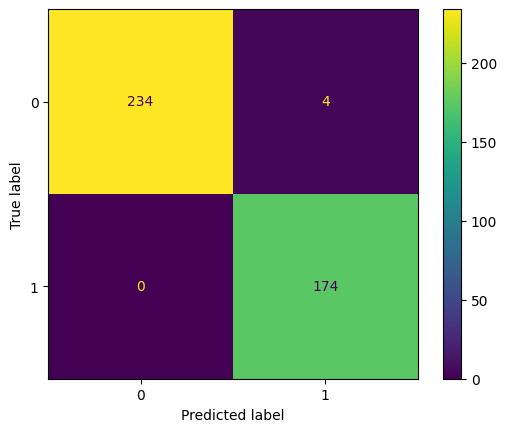

In [43]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

In [44]:
#  now analyzing what is effect of n_estimators on error 

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
errors=[]
misclassifications=[]

for n in range(1,200):
    rfc=RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(X_train,y_train)
    y_pred=rfc.predict(X_test)
    err=1- accuracy_score(y_test,y_pred)
    n_missed= np.sum(y_pred!= y_test)
    
    errors.append(err)
    misclassifications.append(n_missed)

In [47]:
#  visualizing

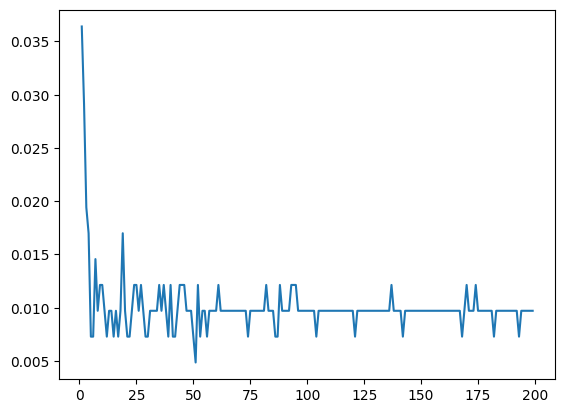

In [49]:
plt.plot(range(1,200),errors)
#  here we are seeing that we are getting threshold value of error